# Descripción del proyecto

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

### Introducción

Megaline es un operador de telecomunicaciones que ofrece servicios de llamadas, mensajes e internet, esto a través de dos tarifas de prepago: Surf y Ultimate. A medida que la empresa busca optimizar sus estrategias de marketing y ajustar sus presupuestos publicitarios, es crucial determinar cuál de estas tarifas resulta más lucrativa. En 2018, Megaline recopiló datos sobre 500 clientes, que incluyen detalles sobre su perfil, ubicación, el tipo de tarifa que utilizan, y su comportamiento en términos de llamadas,mensajes de texto e internet.
Este análisis tiene como objetivo evaluar el rendimiento económico de las tarifas Surf y Ultimate mediante el estudio de los datos disponibles. A través de un examen detallado del comportamiento de los clientes, como la frecuencia de llamadas, la cantidad de mensajes enviados y el trafico web, se determinará cuál de las tarifas genera mayores ingresos para Megaline. Los resultados de este análisis proporcionarán información valiosa para ajustar el presupuesto de publicidad y optimizar las estrategias comerciales de la empresa.

## Inicialización

In [2]:
# Cargar todas las librerías que creemos vamos a utilizar

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats as st
import seaborn as sns



## Cargar datos

In [3]:
# Cargamos los archivos de datos en diferentes DataFrames

users_df = pd.read_csv('/datasets/megaline_users.csv')
calls_df = pd.read_csv('/datasets/megaline_calls.csv')
messages_df = pd.read_csv('/datasets/megaline_messages.csv')
internet_df = pd.read_csv('/datasets/megaline_internet.csv')
plans_df = pd.read_csv('/datasets/megaline_plans.csv')


## Preparar los datos


Realizaremos la exploracion de cada uno de los diferentes dataframes, donde validaremos su informacion inicialmente para comprender un poco su contenido. Validaremos si encontramos valores duplicados y valores ausentes y procederemos a la correccion de los mismos segun sea el caso, adicionalmente revisaremos y enrequiceremos los datos con factores adicionales de ser necesario.


## Tarifas

In [4]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas

#mostramos la informacion del dataframe con el metodo info()

plans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [5]:
# Imprime una muestra de los datos para las tarifas

#mostramos las primeras filas el dataframe 

print(plans_df.head())


   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  



No evidenciamos datos inadecuados y de acuerdo a los valores non-null no se evidencia valores ausentes, sin embargo se realizara la respectiva validacion con los metodos correspondientes y de ser necesarios se corregira.


## Corregir datos

In [6]:
#validamos si tenemos valores duplicados con el metodo duplicated()

print(plans_df.duplicated().sum())


0


In [7]:
#validamos si tenemos valores ausentes con el metodo isna()

print(plans_df.isna().sum())


messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
plan_name                0
dtype: int64


## Enriquecer los datos

De acuerdo a la validacion anterior no evidenciamos factores adicionales para agregar a los datos que nos pudieran ser utilices, los tipos de datos son correctos, los nombres estan correctos y no es necesario adicionar alguna columna extra. encontramos que la tabla de los planes esta correcta.

## Usuarios/as

In [8]:
# Imprime la información general/resumida sobre el DataFrame de usuarios

#mostramos la informacion del dataframe con el metodo info()

users_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [9]:
# Imprime una muestra de datos para usuarios

#mostramos las primeras filas el dataframe 

print(users_df.head())



   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                          Tulsa, OK MSA   
4     1004    Leonila   Thompson   40        Seattle-Tacoma-Bellevue, WA MSA   

     reg_date      plan churn_date  
0  2018-12-24  ultimate        NaN  
1  2018-08-13      surf        NaN  
2  2018-10-21      surf        NaN  
3  2018-01-28      surf        NaN  
4  2018-05-23      surf        NaN  



No evidenciamos datos inadecuados y de acuerdo a los valores non-null se evidencia valores ausentes, se realizara la respectiva validacion con los metodos correspondientes y se realizara la respectiva correccion. 

### Corregir los datos

In [10]:
#validamos si tenemos valores duplicados con el metodo duplicated()

print(users_df.duplicated().sum())


0


In [11]:
#validamos si tenemos valores ausentes con el metodo isna()

print(users_df.isna().sum())


user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64


In [12]:
#rellenamos los valores ausentes con '0' en la columna churn_date con el metodo fillna()

users_df['churn_date'].fillna('0', inplace= True)

print(users_df.isna().sum())  #validamos nuevamente si contamnos con valores ausentes



user_id       0
first_name    0
last_name     0
age           0
city          0
reg_date      0
plan          0
churn_date    0
dtype: int64


### Enriquecer los datos


Evidenciamos que la columna reg_date es una columna de fecha de tipo string, la transformaremos a tipo datetime, adicionalmente agregaremos una nueva columna month extrayendo el mes de la fecha, la cual nos servira mas adelante para el analisis de nuestros datos.

In [13]:
# transformamos la columna reg_date en tipo datetime con el metodo to_datetime() 

users_df['reg_date'] = pd.to_datetime(users_df['reg_date'], format= '%Y-%m-%d')

#creamos una nueva columna llamada 'month' usando el atributo .dt de la columna datetime

users_df['month'] = users_df['reg_date'].dt.month 

print(users_df)

     user_id first_name   last_name  age  \
0       1000   Anamaria       Bauer   45   
1       1001     Mickey   Wilkerson   28   
2       1002     Carlee     Hoffman   36   
3       1003   Reynaldo     Jenkins   52   
4       1004    Leonila    Thompson   40   
..       ...        ...         ...  ...   
495     1495      Fidel      Sharpe   67   
496     1496      Ariel    Shepherd   49   
497     1497      Donte     Barrera   49   
498     1498       Scot  Williamson   51   
499     1499      Shena     Dickson   37   

                                          city   reg_date      plan  \
0        Atlanta-Sandy Springs-Roswell, GA MSA 2018-12-24  ultimate   
1              Seattle-Tacoma-Bellevue, WA MSA 2018-08-13      surf   
2         Las Vegas-Henderson-Paradise, NV MSA 2018-10-21      surf   
3                                Tulsa, OK MSA 2018-01-28      surf   
4              Seattle-Tacoma-Bellevue, WA MSA 2018-05-23      surf   
..                                         ..

## Llamadas

In [14]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas


#mostramos la informacion del dataframe con el metodo info()

calls_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [15]:
# Imprime una muestra de datos para las llamadas

#mostramos las primeras filas el dataframe 

print(calls_df.head())


         id  user_id   call_date  duration
0   1000_93     1000  2018-12-27      8.52
1  1000_145     1000  2018-12-27     13.66
2  1000_247     1000  2018-12-27     14.48
3  1000_309     1000  2018-12-28      5.76
4  1000_380     1000  2018-12-30      4.22



No evidenciamos datos inadecuados y de acuerdo a los valores non-null no se evidencia valores ausentes, sin embargo se realizara la respectiva validacion con los metodos correspondientes y de ser necesarios se corregira.

### Corregir los datos

In [16]:
#validamos si tenemos valores duplicados con el metodo duplicated()

print(calls_df.duplicated().sum())


0


In [17]:
#validamos si tenemos valores ausentes con el metodo isna()

print(calls_df.isna().sum())


id           0
user_id      0
call_date    0
duration     0
dtype: int64


### Enriquecer los datos

Evidenciamos que la columna call_date es una columna de fecha de tipo string, la transformaremos a tipo datetime, adicionalmente agregaremos una nueva columna month extrayendo el mes de la fecha, la cual nos servira mas adelante para el analisis de nuestros datos.

In [18]:
# transformamos la columna call_date en tipo datetime con el metodo to_datetime() 

calls_df['call_date'] = pd.to_datetime(calls_df['call_date'], format= '%Y-%m-%d')

#creamos una nueva columna llamada 'month' usando el atributo .dt de la columna datetime

calls_df['month'] = calls_df['call_date'].dt.month 

print(calls_df)

              id  user_id  call_date  duration  month
0        1000_93     1000 2018-12-27      8.52     12
1       1000_145     1000 2018-12-27     13.66     12
2       1000_247     1000 2018-12-27     14.48     12
3       1000_309     1000 2018-12-28      5.76     12
4       1000_380     1000 2018-12-30      4.22     12
...          ...      ...        ...       ...    ...
137730  1499_199     1499 2018-11-21      8.72     11
137731  1499_200     1499 2018-10-20     10.89     10
137732  1499_201     1499 2018-09-21      8.12      9
137733  1499_202     1499 2018-10-10      0.37     10
137734  1499_203     1499 2018-12-29     13.86     12

[137735 rows x 5 columns]


## Mensajes

In [19]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes

#mostramos la informacion del dataframe con el metodo info()

messages_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [20]:
# Imprime una muestra de datos para los mensajes

#mostramos las primeras filas el dataframe 

print(messages_df.head())


         id  user_id message_date
0  1000_125     1000   2018-12-27
1  1000_160     1000   2018-12-31
2  1000_223     1000   2018-12-31
3  1000_251     1000   2018-12-27
4  1000_255     1000   2018-12-26


No evidenciamos datos inadecuados y de acuerdo a los valores non-null no se evidencia valores ausentes, sin embargo se realizara la respectiva validacion con los metodos correspondientes y de ser necesarios se corregira.

### Corregir los datos

In [21]:
#validamos si tenemos valores duplicados con el metodo duplicated()

print(messages_df.duplicated().sum())


0


In [22]:
#validamos si tenemos valores ausentes con el metodo isna()

print(messages_df.isna().sum())


id              0
user_id         0
message_date    0
dtype: int64


### Enriquecer los datos

Evidenciamos que la columna message_date es una columna de fecha de tipo string, la transformaremos a tipo datetime, adicionalmente agregaremos una nueva columna month extrayendo el mes de la fecha, la cual nos servira mas adelante para el analisis de nuestros datos.

In [23]:
# transformamos la columna message_date en tipo datetime con el metodo to_datetime() 

messages_df['message_date'] = pd.to_datetime(messages_df['message_date'], format= '%Y-%m-%d')

#creamos una nueva columna llamada 'month' usando el atributo .dt de la columna datetime

messages_df['month'] = messages_df['message_date'].dt.month 

print(messages_df)

             id  user_id message_date  month
0      1000_125     1000   2018-12-27     12
1      1000_160     1000   2018-12-31     12
2      1000_223     1000   2018-12-31     12
3      1000_251     1000   2018-12-27     12
4      1000_255     1000   2018-12-26     12
...         ...      ...          ...    ...
76046  1497_526     1497   2018-12-24     12
76047  1497_536     1497   2018-12-24     12
76048  1497_547     1497   2018-12-31     12
76049  1497_558     1497   2018-12-24     12
76050  1497_613     1497   2018-12-23     12

[76051 rows x 4 columns]


## Internet

In [24]:
# Imprime la información general/resumida sobre el DataFrame de internet

#mostramos la informacion del dataframe con el metodo info()

internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [25]:
# Imprime una muestra de datos para el tráfico de internet

#mostramos las primeras filas el dataframe 

print(internet_df.head())


         id  user_id session_date  mb_used
0   1000_13     1000   2018-12-29    89.86
1  1000_204     1000   2018-12-31     0.00
2  1000_379     1000   2018-12-28   660.40
3  1000_413     1000   2018-12-26   270.99
4  1000_442     1000   2018-12-27   880.22


No evidenciamos datos inadecuados y de acuerdo a los valores non-null no se evidencia valores ausentes, sin embargo se realizara la respectiva validacion con los metodos correspondientes y de ser necesarios se corregira.

### Corregir los datos

In [26]:
#validamos si tenemos valores duplicados con el metodo duplicated()

print(internet_df.duplicated().sum())


0


In [27]:
#validamos si tenemos valores ausentes con el metodo isna()

print(internet_df.isna().sum())


id              0
user_id         0
session_date    0
mb_used         0
dtype: int64


### Enriquecer los datos

Evidenciamos que la columna session_date es una columna de fecha de tipo string, la transformaremos a tipo datetime, adicionalmente agregaremos una nueva columna month extrayendo el mes de la fecha, la cual nos servira mas adelante para el analisis de nuestros datos.


In [28]:
# transformamos la columna message_date en tipo datetime con el metodo to_datetime() 

internet_df['session_date'] = pd.to_datetime(internet_df['session_date'], format= '%Y-%m-%d')

#creamos una nueva columna llamada 'month' usando el atributo .dt de la columna datetime

internet_df['month'] = internet_df['session_date'].dt.month 

print(internet_df)

              id  user_id session_date  mb_used  month
0        1000_13     1000   2018-12-29    89.86     12
1       1000_204     1000   2018-12-31     0.00     12
2       1000_379     1000   2018-12-28   660.40     12
3       1000_413     1000   2018-12-26   270.99     12
4       1000_442     1000   2018-12-27   880.22     12
...          ...      ...          ...      ...    ...
104820  1499_215     1499   2018-10-20   218.06     10
104821  1499_216     1499   2018-12-30   304.72     12
104822  1499_217     1499   2018-09-22   292.75      9
104823  1499_218     1499   2018-12-07     0.00     12
104824  1499_219     1499   2018-12-24   758.31     12

[104825 rows x 5 columns]


## Estudiar las condiciones de las tarifas

Es sumamente importante entender cómo funcionan las tarifas, cómo se les cobra a los usuarios en función de su plan de suscripción. Así que te sugerimos imprimir la información de la tarifa para ver una vez más sus condiciones.

In [29]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras

plans_df

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Agregar datos por usuario


In [30]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
#agrupamos con el metodo groupby por user_id y month y contamos el numero de llamadas de la columna id y asignamos los resultados en una nueva columna llamada call_count

calls_user_per_month = calls_df.groupby(['user_id', 'month'])['id'].count().reset_index(name='call_count')
print(calls_user_per_month)

      user_id  month  call_count
0        1000     12          16
1        1001      8          27
2        1001      9          49
3        1001     10          65
4        1001     11          64
...       ...    ...         ...
2253     1498     12          39
2254     1499      9          41
2255     1499     10          53
2256     1499     11          45
2257     1499     12          65

[2258 rows x 3 columns]


In [31]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.

#agrupamos con el metodo groupby por user_id y month y sumamos el numero de minutos de la columna duration y asignamos los resultados en una nueva columna llamada total_minutes

minutes_user_per_month = calls_df.groupby(['user_id', 'month'])['duration'].sum().reset_index(name='total_minutes')
print(minutes_user_per_month)

      user_id  month  total_minutes
0        1000     12         116.83
1        1001      8         171.14
2        1001      9         297.69
3        1001     10         374.11
4        1001     11         404.59
...       ...    ...            ...
2253     1498     12         324.77
2254     1499      9         330.37
2255     1499     10         363.28
2256     1499     11         288.56
2257     1499     12         468.10

[2258 rows x 3 columns]


In [32]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.

#agrupamos con el metodo groupby por user_id y month y contamos el numero de mensajes de la columna id y asignamos los resultados en una nueva columna llamada messages_count

messages_user_per_month = messages_df.groupby(['user_id', 'month'])['id'].count().reset_index(name='messages_count')
print(messages_user_per_month)

      user_id  month  messages_count
0        1000     12              11
1        1001      8              30
2        1001      9              44
3        1001     10              53
4        1001     11              36
...       ...    ...             ...
1801     1496      9              21
1802     1496     10              18
1803     1496     11              13
1804     1496     12              11
1805     1497     12              50

[1806 rows x 3 columns]


In [33]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.

#agrupamos con el metodo groupby por user_id y month y sumamos el numero de megabytes(mb) usado de la columna mb_used y asignamos los resultados en una nueva columna llamada total_mb_used

internet_user_per_month = internet_df.groupby(['user_id', 'month'])['mb_used'].sum().reset_index(name='total_mb_used')
print(internet_user_per_month)

      user_id  month  total_mb_used
0        1000     12        1901.47
1        1001      8        6919.15
2        1001      9       13314.82
3        1001     10       22330.49
4        1001     11       18504.30
...       ...    ...            ...
2272     1498     12       23137.69
2273     1499      9       12984.76
2274     1499     10       19492.43
2275     1499     11       16813.83
2276     1499     12       22059.21

[2277 rows x 3 columns]


In [34]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month

#unimos las tablas calls_user_per_month y minutes_user_per_month con el metodo merge con base en las columnas user_id y month
merged_1 = calls_user_per_month.merge(minutes_user_per_month, on= ['user_id', 'month'], how= 'outer')

#unimos las tablas merged_1 y messages_user_per_month con el metodo merge con base en las columnas user_id y month
merged_2 = merged_1.merge(messages_user_per_month, on= ['user_id', 'month'], how= 'outer')

#unimos las tablas merged_2 y internet_user_per_month con el metodo merge con base en las columnas user_id y month

all_data_merged = merged_2.merge(internet_user_per_month, on= ['user_id', 'month'], how= 'outer')

print(all_data_merged)

      user_id  month  call_count  total_minutes  messages_count  total_mb_used
0        1000     12        16.0         116.83            11.0        1901.47
1        1001      8        27.0         171.14            30.0        6919.15
2        1001      9        49.0         297.69            44.0       13314.82
3        1001     10        65.0         374.11            53.0       22330.49
4        1001     11        64.0         404.59            36.0       18504.30
...       ...    ...         ...            ...             ...            ...
2288     1349     12         NaN            NaN            61.0       13039.91
2289     1361      5         NaN            NaN             2.0        1519.69
2290     1482     10         NaN            NaN             2.0            NaN
2291     1108     12         NaN            NaN             NaN         233.17
2292     1311      6         NaN            NaN             NaN        1498.83

[2293 rows x 6 columns]


In [35]:
# Añade la información de la tarifa

#primero extraigo de la tabla users_df las columnas de user_id, plan y city

user_plans = users_df[['user_id', 'city', 'plan']]

#cambiamos el nombre de la columna plan por plan_name para que quede igual el nombre que tiene la tabla plans_df
new_columns = {'user_id':'user_id', 'city':'city', 'plan':'plan_name'}
user_plans = user_plans.rename(columns= new_columns)

#unimos las tablas all_data_merged y user_plans con el metodo merge con base en la columna user_id para adicionale el plan y la ciudad a la nueva tabla

usage_data = all_data_merged.merge(user_plans, on= ['user_id'], how= 'outer' )

print(usage_data)



      user_id  month  call_count  total_minutes  messages_count  \
0        1000   12.0        16.0         116.83            11.0   
1        1001    8.0        27.0         171.14            30.0   
2        1001    9.0        49.0         297.69            44.0   
3        1001   10.0        65.0         374.11            53.0   
4        1001   11.0        64.0         404.59            36.0   
...       ...    ...         ...            ...             ...   
2298     1307    NaN         NaN            NaN             NaN   
2299     1319    NaN         NaN            NaN             NaN   
2300     1378    NaN         NaN            NaN             NaN   
2301     1463    NaN         NaN            NaN             NaN   
2302     1473    NaN         NaN            NaN             NaN   

      total_mb_used                                    city plan_name  
0           1901.47   Atlanta-Sandy Springs-Roswell, GA MSA  ultimate  
1           6919.15         Seattle-Tacoma-Bellevue

Calcula los ingresos mensuales por usuario (resta el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; multiplica el resultado por el valor del plan de llamadas; añade la tarifa mensual en función del plan de llamadas). Nota: Dadas las condiciones del plan, ¡esto podría no ser tan trivial como un par de líneas! Así que no pasa nada si dedicas algo de tiempo a ello.

In [36]:
# Calcula el ingreso mensual para cada usuario

#unimos la tabla anterior usage_data_plans con la tabla plans_df con el metodo merge con base en la columna plan_name

usage_data_plans = usage_data.merge(plans_df, on= ['plan_name'], how= 'left' )

# Aseguramos de que las diferencias no sean negativas con el metodo apply y la funcion lambda
extra_minutes = usage_data_plans['total_minutes'] - usage_data_plans['minutes_included']
extra_minutes = extra_minutes.apply(lambda x: max(x, 0))

extra_messages = usage_data_plans['messages_count'] - usage_data_plans['messages_included']
extra_messages = extra_messages.apply(lambda x: max(x, 0)) 

extra_mb = usage_data_plans['total_mb_used'] - usage_data_plans['mb_per_month_included']
extra_mb = extra_mb.apply(lambda x: max(x, 0))

# Calculamos los cargos adicionales
usage_data_plans['monthly_income'] = (
    usage_data_plans['usd_monthly_pay'] +
    (extra_minutes * usage_data_plans['usd_per_minute']) +
    (extra_messages * usage_data_plans['usd_per_message']) +
    ((extra_mb / 1024) * usage_data_plans['usd_per_gb'])  # Convertimos MB a GB
)

usage_data_plans

,user_id,month,call_count,total_minutes,messages_count,total_mb_used,city,plan_name,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,monthly_income
0,1000,12.0,16.0,116.83,11.0,1901.47,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,1000,30720,3000,70,7,0.01,0.01,70.000000
1,1001,8.0,27.0,171.14,30.0,6919.15,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,15360,500,20,10,0.03,0.03,20.000000
2,1001,9.0,49.0,297.69,44.0,13314.82,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,15360,500,20,10,0.03,0.03,20.000000
3,1001,10.0,65.0,374.11,53.0,22330.49,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,15360,500,20,10,0.03,0.03,88.161191
4,1001,11.0,64.0,404.59,36.0,18504.30,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,15360,500,20,10,0.03,0.03,50.706055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2298,1307,NaN,NaN,NaN,NaN,NaN,"Boston-Cambridge-Newton, MA-NH MSA",surf,50,15360,500,20,10,0.03,0.03,NaN
2299,1319,NaN,NaN,NaN,NaN,NaN,"Colorado Springs, CO MSA",surf,50,15360,500,20,10,0.03,0.03,NaN
2300,1378,NaN,NaN,NaN,NaN,NaN,"Denver-Aurora-Lakewood, CO MSA",surf,50,15360,500,20,10,0.03,0.03,NaN
2301,1463,NaN,NaN,NaN,NaN,NaN,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,1000,30720,3000,70,7,0.01,0.01,NaN


## Estudia el comportamiento de usuario

Calcula algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Dibuja gráficos útiles para facilitar la comprensión. Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas deben calcularse por tarifa.


### Llamadas

   plan_name  month  avg_call_duration
0       surf    1.0         192.840000
1       surf    2.0         280.851111
2       surf    3.0         310.970000
3       surf    4.0         332.380000
4       surf    5.0         387.108000
5       surf    6.0         411.450625
6       surf    7.0         428.060917
7       surf    8.0         394.474717
8       surf    9.0         397.133298
9       surf   10.0         414.435733
10      surf   11.0         408.255415
11      surf   12.0         457.547074
12  ultimate    1.0         183.162500
13  ultimate    2.0         443.171667
14  ultimate    3.0         285.701667
15  ultimate    4.0         316.508095
16  ultimate    5.0         383.664828
17  ultimate    6.0         365.358222
18  ultimate    7.0         403.767288
19  ultimate    8.0         397.274789
20  ultimate    9.0         413.287326
21  ultimate   10.0         429.217238
22  ultimate   11.0         423.814683
23  ultimate   12.0         438.824832

plan_name  month        

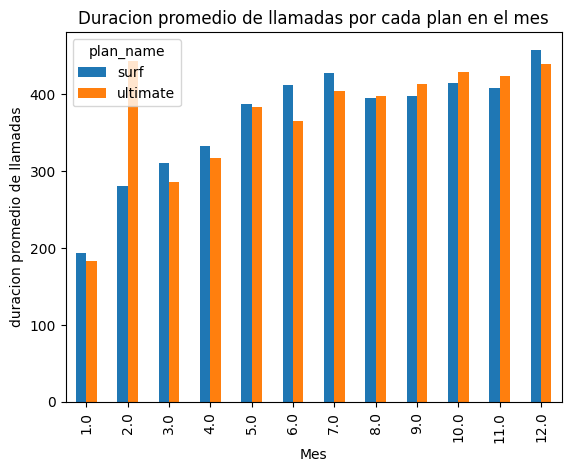

In [37]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.

# agrupamos por la columna plan_name y month y calculamos la duracion promedio de las llamadas
avg_call_duration = usage_data_plans.groupby(['plan_name', 'month'])['total_minutes'].mean().reset_index(name='avg_call_duration')
print(avg_call_duration)

# organizmos la tabla con el metodo pivot_table el cual nos permite convertir las filas en columnas basadas en el plan_name, esto para posteriormente facilitar el grafico
avg_call_duration = avg_call_duration.pivot_table(
    index='month',
    columns='plan_name',
    values='avg_call_duration',
    ).reset_index()

print()
print(avg_call_duration)

# realizamos un grafico de barras para visualizar mejor lo anterior, usamos el metod plot 

avg_call_duration.plot(kind= 'bar',
                       x= 'month',
                       title='Duracion promedio de llamadas por cada plan en el mes',
                       xlabel='Mes',
                       ylabel='duracion promedio de llamadas',
                       
                      )
plt.show()

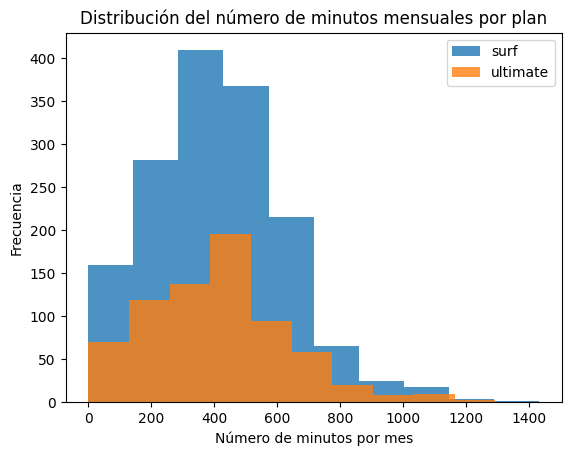

In [38]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.

# primero separamos los datos por plan
surf_plan = usage_data_plans[usage_data_plans['plan_name'] == 'surf']
ultimate_plan = usage_data_plans[usage_data_plans['plan_name'] == 'ultimate']

# realizamos un histograma para cada plan con el metodo plot

surf_plan['total_minutes'].plot(kind='hist', alpha=0.8, label= 'surf')
ultimate_plan['total_minutes'].plot(kind='hist', alpha=0.8, label= 'ultimate')
plt.legend(['surf', 'ultimate'])
plt.title('Distribución del número de minutos mensuales por plan')
plt.xlabel('Número de minutos por mes')
plt.ylabel('Frecuencia')

plt.show()

Calcula la media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.

In [39]:
# Calcula la media y la varianza de la duración mensual de llamadas.

#primero agrupamos por plan_name y month 
grouped_data = usage_data_plans.groupby(['plan_name', 'month'])['total_minutes']

# Calculamos la media de la duración mensual de llamadas
mean_duration = grouped_data.mean()
print(mean_duration)
# Calcular la varianza de la duración mensual de llamadas
variance_duration = grouped_data.var()
print()
print(variance_duration)

plan_name  month
surf       1.0      192.840000
           2.0      280.851111
           3.0      310.970000
           4.0      332.380000
           5.0      387.108000
           6.0      411.450625
           7.0      428.060917
           8.0      394.474717
           9.0      397.133298
           10.0     414.435733
           11.0     408.255415
           12.0     457.547074
ultimate   1.0      183.162500
           2.0      443.171667
           3.0      285.701667
           4.0      316.508095
           5.0      383.664828
           6.0      365.358222
           7.0      403.767288
           8.0      397.274789
           9.0      413.287326
           10.0     429.217238
           11.0     423.814683
           12.0     438.824832
Name: total_minutes, dtype: float64

plan_name  month
surf       1.0      14795.440200
           2.0      46959.219961
           3.0      31821.317991
           4.0      45615.666796
           5.0      50778.127459
           6.0      

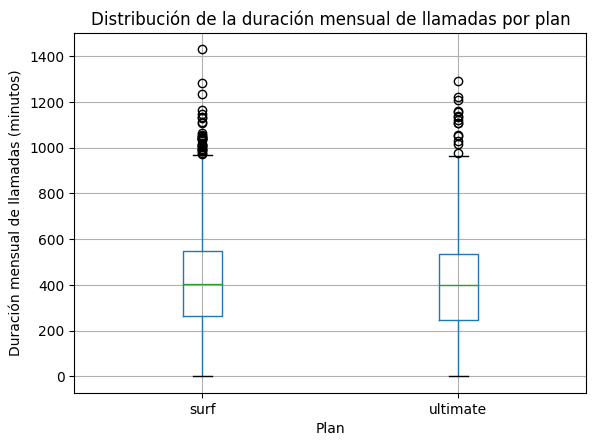

In [40]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas

# Creamos el diagrama de caja con el metodo boxplot()
usage_data_plans.boxplot(column='total_minutes', by='plan_name')

# Añadimos títulos y etiquetas
plt.title('Distribución de la duración mensual de llamadas por plan')
plt.suptitle('')  # Quita el título por defecto que añade pandas
plt.xlabel('Plan')
plt.ylabel('Duración mensual de llamadas (minutos)')

plt.show()



La duracion promedio de llamadas por plan varia en cada mes donde el promedio del plan surf es ligeramente mayor en la mayoria de meses, sin embargo, En algunos meses, como en el mes 2, el plan "ultimate" tiene una duración promedio  mayor en comparación con el plan "surf".

en la distribucion de minutos mensuales por plan Los usuarios del plan "surf" tienen una mayor concentración alrededor de los 300-600 minutos mensuales. Los usuarios del plan "ultimate" tienen una concentración ligeramente más alta en el rango de 400-700 minutos mensuales. los usuarios del plan "ultimate" tienden a usar más minutos en promedio que los usuarios del plan "surf".

Del diagrama de caja podemos indicar que ambas medianas están cerca, indicando que los usuarios de ambos planes tienen una duración mensual de llamadas similar en términos de valor central. hay presencia de muchos valores atípicos en ambos planes, lo que podria indicar que hay usuarios con un uso de minutos alto en ambos planes.
El plan "ultimate" tiende a tener usuarios con un uso más alto de minutos en comparación con el plan "surf". Esto puede deberse a que el plan "ultimate" ofrece más minutos incluidos o mejores tarifas por minuto.

el plan "ultimate" tiende a ser utilizado por usuarios que necesitan o desean hablar más minutos al mes. Esto sugiere que el plan podría estar atrayendo a usuarios con mayores necesidades de comunicación, posiblemente debido a las ventajas que ofrece en términos de minutos incluidos o tarifas.


### Mensajes

   plan_name  month  avg_messages
0       surf    1.0     21.000000
1       surf    2.0     21.600000
2       surf    3.0     21.937500
3       surf    4.0     24.166667
4       surf    5.0     33.017857
5       surf    6.0     33.616438
6       surf    7.0     35.945055
7       surf    8.0     37.596774
8       surf    9.0     39.523179
9       surf   10.0     42.433862
10      surf   11.0     40.553097
11      surf   12.0     48.326772
12  ultimate    1.0     20.666667
13  ultimate    2.0     25.166667
14  ultimate    3.0     34.714286
15  ultimate    4.0     28.937500
16  ultimate    5.0     44.333333
17  ultimate    6.0     36.289474
18  ultimate    7.0     41.212766
19  ultimate    8.0     47.929825
20  ultimate    9.0     45.901408
21  ultimate   10.0     46.977528
22  ultimate   11.0     47.601942
23  ultimate   12.0     53.936508

plan_name  month       surf   ultimate
0            1.0  21.000000  20.666667
1            2.0  21.600000  25.166667
2            3.0  21.937500  34.

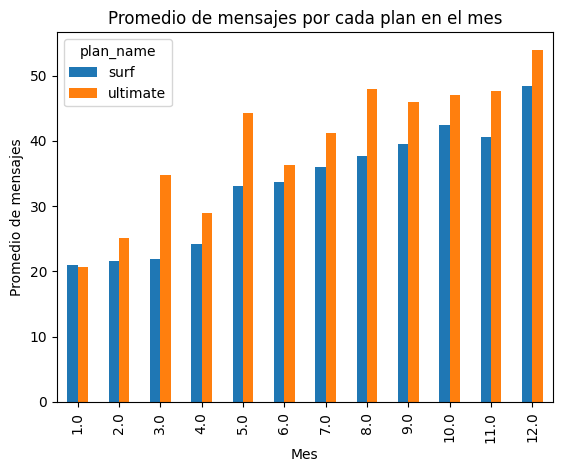

In [41]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan

# agrupamos por la columna plan_name y month y calculamos el promedio de mensajes por mes
avg_messages = usage_data_plans.groupby(['plan_name', 'month'])['messages_count'].mean().reset_index(name='avg_messages')
print(avg_messages)

 #organizmos la tabla con el metodo pivot_table el cual nos permite convertir las filas en columnas basadas en el plan_name, esto para posteriormente facilitar el grafico
avg_messages = avg_messages.pivot_table(
    index='month',
    columns='plan_name',
    values='avg_messages',
    ).reset_index()

print()
print(avg_messages)

# realizamos un grafico de barras para visualizar mejor lo anterior, usamos el metod plot 

avg_messages.plot(kind= 'bar',
                       x= 'month',
                       title='Promedio de mensajes por cada plan en el mes',
                       xlabel='Mes',
                       ylabel='Promedio de mensajes',
                       
                      )
plt.show()

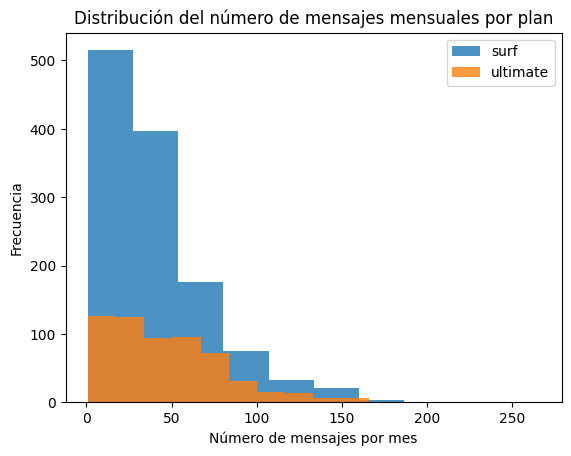

In [42]:
# Comparamos el número de mensajes mensuales que necesitan los usuarios de cada plan. Traza un histograma.

# realizamos un histograma para cada plan con el metodo plot (anteriormente ya habiamos separado los datos por plan: surf_plan y ultimate_plan)

surf_plan['messages_count'].plot(kind='hist', alpha=0.8, label= 'surf')
ultimate_plan['messages_count'].plot(kind='hist', alpha=0.8, label= 'ultimate')
plt.legend(['surf', 'ultimate'])
plt.title('Distribución del número de mensajes mensuales por plan')
plt.xlabel('Número de mensajes por mes')
plt.ylabel('Frecuencia')

plt.show()


In [43]:
# Calculamos la media y la varianza mensual de mensajes.

#primero agrupamos por plan_name y month 
grouped_data_messages = usage_data_plans.groupby(['plan_name', 'month'])['messages_count']

# Calculamos la media mensual de mensajes
mean_messages = grouped_data_messages.mean()
print(mean_messages)
# Calcular la varianza mensual de mensajes
variance_messages = grouped_data_messages.var()
print()
print(variance_messages)

plan_name  month
surf       1.0      21.000000
           2.0      21.600000
           3.0      21.937500
           4.0      24.166667
           5.0      33.017857
           6.0      33.616438
           7.0      35.945055
           8.0      37.596774
           9.0      39.523179
           10.0     42.433862
           11.0     40.553097
           12.0     48.326772
ultimate   1.0      20.666667
           2.0      25.166667
           3.0      34.714286
           4.0      28.937500
           5.0      44.333333
           6.0      36.289474
           7.0      41.212766
           8.0      47.929825
           9.0      45.901408
           10.0     46.977528
           11.0     47.601942
           12.0     53.936508
Name: messages_count, dtype: float64

plan_name  month
surf       1.0              NaN
           2.0       512.800000
           3.0       352.062500
           4.0       534.028571
           5.0       867.945130
           6.0       936.406393
           7.0  

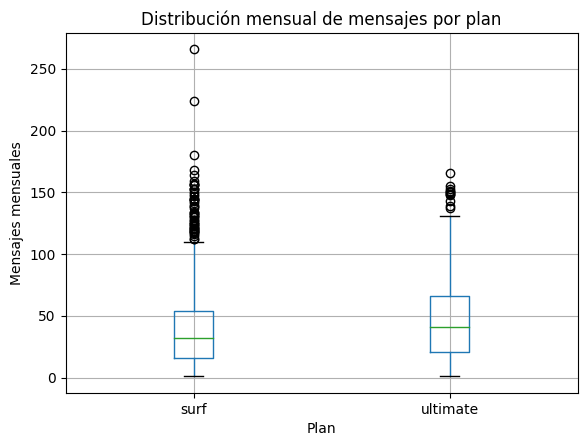

In [44]:
# Trazamos un diagrama de caja para visualizar la distribución mensual de mensajes

# Creamos el diagrama de caja con el metodo boxplot()
usage_data_plans.boxplot(column='messages_count', by='plan_name')

# Añadimos títulos y etiquetas
plt.title('Distribución mensual de mensajes por plan')
plt.suptitle('')  # Quita el título por defecto que añade pandas
plt.xlabel('Plan')
plt.ylabel('Mensajes mensuales')

plt.show()


En general, los usuarios del plan "ultimate" envían más mensajes por mes que los usuarios del plan "surf".
La diferencia en el uso de mensajes entre ambos planes parece aumentar con el tiempo, siendo más pronunciada en los últimos meses mostrados.

El histograma muestra que una gran cantidad de usuarios de ambos planes envían pocos mensajes (0-50 por mes).El plan "surf" tiene una distribución más concentrada en valores bajos de mensajes.

El diagrama de caja confirma que el plan "ultimate" tiene una mediana más alta de mensajes enviados que el plan "surf". Ambos planes tienen valores atipicos por encima de su rango normal, pero el plan "ultimate" parece tener valores atipicos más extremos.

Los usuarios del plan "ultimate" tienden a enviar más mensajes en promedio que los usuarios del plan "surf" y el plan "surf" parece ser más popular entre usuarios que envían menos mensajes de manera consistente.





### Internet

   plan_name  month  avg_internet
0       surf    1.0   4874.860000
1       surf    2.0  12178.843333
2       surf    3.0  13345.440000
3       surf    4.0  12228.778571
4       surf    5.0  14119.728026
5       surf    6.0  15623.666632
6       surf    7.0  16923.463917
7       surf    8.0  17112.224403
8       surf    9.0  16677.397254
9       surf   10.0  17533.275256
10      surf   11.0  16455.548043
11      surf   12.0  18189.669590
12  ultimate    1.0   6918.092500
13  ultimate    2.0  17128.808571
14  ultimate    3.0  18321.518333
15  ultimate    4.0  16121.654762
16  ultimate    5.0  16624.482414
17  ultimate    6.0  15337.921064
18  ultimate    7.0  16344.744407
19  ultimate    8.0  17814.720141
20  ultimate    9.0  16969.869535
21  ultimate   10.0  17780.292000
22  ultimate   11.0  17033.685354
23  ultimate   12.0  18323.191854

plan_name  month          surf      ultimate
0            1.0   4874.860000   6918.092500
1            2.0  12178.843333  17128.808571
2            3

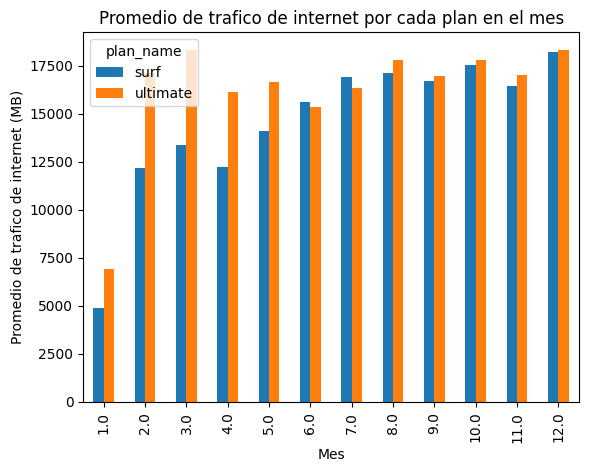

In [45]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan

# agrupamos por la columna plan_name y month y calculamos el promedio de trafico de internet por mes
avg_internet = usage_data_plans.groupby(['plan_name', 'month'])['total_mb_used'].mean().reset_index(name='avg_internet')
print(avg_internet)

 #organizmos la tabla con el metodo pivot_table el cual nos permite convertir las filas en columnas basadas en el plan_name, esto para posteriormente facilitar el grafico
avg_internet = avg_internet.pivot_table(
    index='month',
    columns='plan_name',
    values='avg_internet',
    ).reset_index()

print()
print(avg_internet)

# realizamos un grafico de barras para visualizar mejor lo anterior, usamos el metod plot 

avg_internet.plot(kind= 'bar',
                       x= 'month',
                       title='Promedio de trafico de internet por cada plan en el mes',
                       xlabel='Mes',
                       ylabel='Promedio de trafico de internet (MB)',
                       
                      )
plt.show()

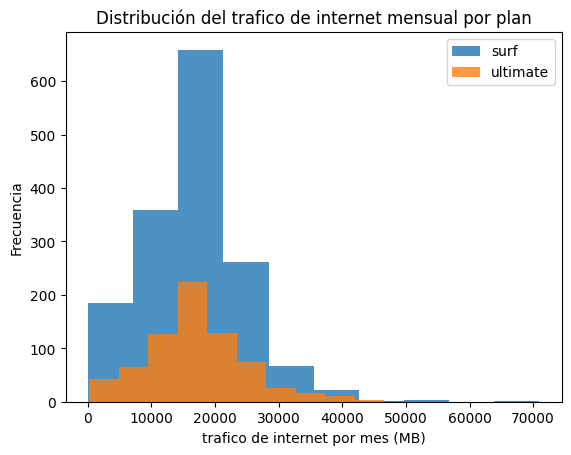

In [46]:
# Comparamos el trafico de internet mensual que necesitan los usuarios de cada plan. Traza un histograma.

# realizamos un histograma para cada plan con el metodo plot (anteriormente ya habiamos separado los datos por plan: surf_plan y ultimate_plan)

surf_plan['total_mb_used'].plot(kind='hist', alpha=0.8, label= 'surf')
ultimate_plan['total_mb_used'].plot(kind='hist', alpha=0.8, label= 'ultimate')
plt.legend(['surf', 'ultimate'])
plt.title('Distribución del trafico de internet mensual por plan')
plt.xlabel('trafico de internet por mes (MB)')
plt.ylabel('Frecuencia')

plt.show()


In [47]:
# Calculamos la media y la varianza mensual de trafico de internet.

#primero agrupamos por plan_name y month 
grouped_data_internet = usage_data_plans.groupby(['plan_name', 'month'])['total_mb_used']

# Calculamos la media mensual del trafico de internet
mean_internet = grouped_data_internet.mean()
print(mean_internet)
# Calcular la varianza mensual del trafico de internet
variance_internet = grouped_data_internet.var()
print()
print(variance_internet)

plan_name  month
surf       1.0       4874.860000
           2.0      12178.843333
           3.0      13345.440000
           4.0      12228.778571
           5.0      14119.728026
           6.0      15623.666632
           7.0      16923.463917
           8.0      17112.224403
           9.0      16677.397254
           10.0     17533.275256
           11.0     16455.548043
           12.0     18189.669590
ultimate   1.0       6918.092500
           2.0      17128.808571
           3.0      18321.518333
           4.0      16121.654762
           5.0      16624.482414
           6.0      15337.921064
           7.0      16344.744407
           8.0      17814.720141
           9.0      16969.869535
           10.0     17780.292000
           11.0     17033.685354
           12.0     18323.191854
Name: total_mb_used, dtype: float64

plan_name  month
surf       1.0      1.823995e+07
           2.0      4.367296e+07
           3.0      6.824556e+07
           4.0      5.722187e+07
     

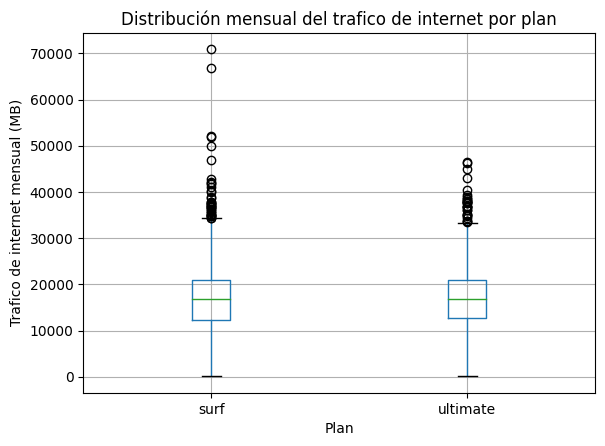

In [48]:
# Trazamos un diagrama de caja para visualizar la distribución mensual del trafico de internet

# Creamos el diagrama de caja con el metodo boxplot()
usage_data_plans.boxplot(column='total_mb_used', by='plan_name')

# Añadimos títulos y etiquetas
plt.title('Distribución mensual del trafico de internet por plan')
plt.suptitle('')  # Quita el título por defecto que añade pandas
plt.xlabel('Plan')
plt.ylabel('Trafico de internet mensual (MB)')

plt.show()


Los usuarios del plan "ultimate" tienden a consumir más tráfico de Internet que los del plan "surf" en la mayoría de los meses. Ambos planes muestran una tendencia general al aumento en el consumo de datos a lo largo del tiempo.

el histograma muestra que el rango de consumo de datos para la mayoría de los usuarios se sitúa entre 0 y 40,000 MB por mes. el plan "Surf" tiene una distribución más concentrada, con un pico más alto alrededor de los 15,000-20,000 MB. el plan "ultimate" muestra una distribución más amplia y aplanada en comparación con el plan Surf.

El diagrama de caja muestra que la mediana de consumo de datos es muy similar en ambos planes, tienen una variabilidad similar en el consumo de datos, como se evidencia por el tamaño similar de las cajas. ambos planes tienen valores atipicos, lo que nos dice que algunos usuarios consumen mas internet que el promedio. 
  


## Ingreso

Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.

   plan_name  month  monthly_income
0       surf    1.0       20.000000
1       surf    2.0       23.535460
2       surf    3.0       35.910969
3       surf    4.0       38.531525
4       surf    5.0       48.261003
5       surf    6.0       48.511837
6       surf    7.0       58.412025
7       surf    8.0       60.973600
8       surf    9.0       53.659630
9       surf   10.0       61.458334
10      surf   11.0       53.983152
11      surf   12.0       64.496432
12  ultimate    1.0       70.000000
13  ultimate    2.0       70.000000
14  ultimate    3.0       75.815625
15  ultimate    4.0       73.008492
16  ultimate    5.0       70.712184
17  ultimate    6.0       71.876164
18  ultimate    7.0       72.322860
19  ultimate    8.0       72.307438
20  ultimate    9.0       71.240676
21  ultimate   10.0       72.002108
22  ultimate   11.0       71.993656
23  ultimate   12.0       72.503138

plan_name  month       surf   ultimate
0            1.0  20.000000  70.000000
1            2.0  23.

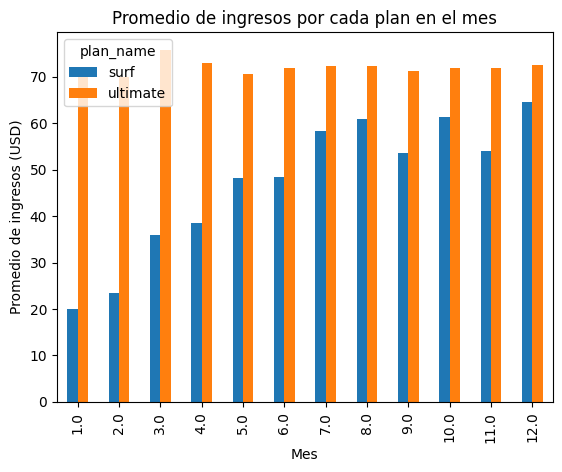

In [49]:
# agrupamos por la columna plan_name y month y calculamos el promedio de ingresos de cada plan por mes 
avg_income = usage_data_plans.groupby(['plan_name', 'month'])['monthly_income'].mean().reset_index(name='monthly_income')
print(avg_income)

# organizmos la tabla con el metodo pivot_table el cual nos permite convertir las filas en columnas basadas en el plan_name, esto para posteriormente facilitar el grafico
avg_income = avg_income.pivot_table(
    index='month',
    columns='plan_name',
    values='monthly_income',
    ).reset_index()

print()
print(avg_income)

# realizamos un grafico de barras para visualizar mejor lo anterior, usamos el metod plot 

avg_income.plot(kind= 'bar',
                       x= 'month',
                       title='Promedio de ingresos por cada plan en el mes',
                       xlabel='Mes',
                       ylabel='Promedio de ingresos (USD)',
                       
                      )
plt.show()

In [50]:
#agrupamos por la columna plan_name los ingresos mensuales y aplicamos el metodo describe para obtener estadisticas descriptivas

statistics = usage_data_plans.groupby('plan_name')['monthly_income'].describe()

#calculamos la varianza ya que con el metodo describe no se refleja

variance= usage_data_plans.groupby('plan_name')['monthly_income'].var()

#agregamos la varianza a la tabla statistics
statistics['var'] = variance

print(statistics)

            count       mean        std   min   25%        50%       75%  \
plan_name                                                                  
surf       1180.0  56.877475  51.828245  20.0  20.0  36.841452  76.30906   
ultimate    579.0  72.062930  10.482571  70.0  70.0  70.000000  70.00000   

                  max          var  
plan_name                           
surf       581.328509  2686.166996  
ultimate   178.522764   109.884303  


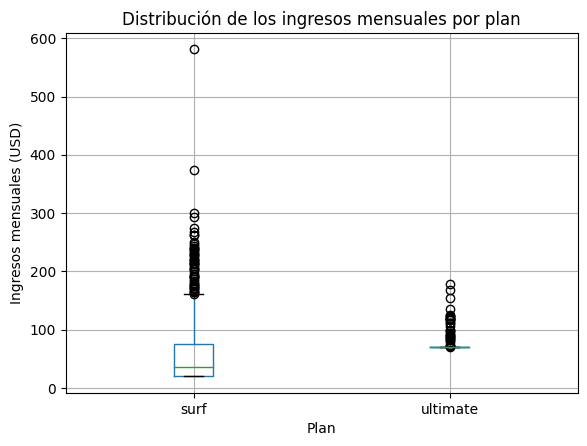

In [51]:
#para visualizar lo anterior usamos un diagrama de caja para mostrar la distribución de los ingresos por plan.

# Creamos el diagrama de caja con el metodo boxplot()
usage_data_plans.boxplot(column='monthly_income', by='plan_name')

# Añadimos títulos y etiquetas
plt.title('Distribución de los ingresos mensuales por plan')
plt.suptitle('')  # Quita el título por defecto que añade pandas
plt.xlabel('Plan')
plt.ylabel('Ingresos mensuales (USD)')

plt.show()



La media de los ingresos para el plan "ultimate" es mayor que la del plan "surf". Esto indica que, en promedio, los usuarios del plan "ultimate" generan más ingresos.
la desviacion estandar y varianza son mayores en el plan surf, lo que indica que hay mayor variabilidad en el plan Surf y los ingresos del plan Ultimate son mas consistentes y se acercan mas al promedio.
el valor maximo del plan Surf es mucho mayor que el plan ultimate, lo que indicaria que puede generar ingresos altos aunque no sea frecuente.
Los ingresos del plan "ultimate" son más estables y predecibles.

## Prueba las hipótesis estadísticas

Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.

In [52]:
# Prueba las hipótesis

#Hipotesis Nula (Ho): "No, no hay diferencia entre los ingresos promedio de ambos planes y los parámetros en cuestión son iguales".

#Hipotesis Alternativa (H1): "Si hay diferencia entre los ingresos promedio de los planes Ultimate y Surf"

# primero filtramos los datos para los planes Ultimate y Surf, usamos dropna para eliminar valores ausentes que puedan afectar nuestro calculo
ultimate_data = usage_data_plans[usage_data_plans['plan_name'] == 'ultimate']['monthly_income'].dropna()
surf_data = usage_data_plans[usage_data_plans['plan_name'] == 'surf']['monthly_income'].dropna()

#realizamos la prueba t para probar la hipotesis 

alpha = 0.05  # colocamos el nivel de significancia estadística crítica, si el valor p es menor que alpha, rechazamos la hipótesis

results = st.ttest_ind(ultimate_data, surf_data, equal_var = False) #establecemos el parametro equal_var en false ya que las varianzas entre ambos difieren significativamente

print('valor p: ', results.pvalue) # extraer el valor p

if results.pvalue < alpha:  # comparamos el valor p con alpha
    print("Rechazamos la hipótesis nula, Los ingresos promedio de los planes Ultimate y Surf son significativamente diferentes")
else:
    print("No podemos rechazar la hipótesis nula, No hay evidencia suficiente para decir que los ingresos promedio de los planes Ultimate y Surf son diferentes")


valor p:  1.939793941041678e-21
Rechazamos la hipótesis nula, Los ingresos promedio de los planes Ultimate y Surf son significativamente diferentes


Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.

In [53]:
# Prueba las hipótesis

#Hipotesis Nula (Ho): "No, no hay diferencia entre los ingresos promedio entre los usuarios del area de NY-NJ y otras regiones, y los parámetros en cuestión son iguales".

#Hipotesis Alternativa (H1): "Si hay diferencia entre los ingresos promedio de los usuarios del area de NY-NJ y otras regiones"

# Filtramos los datos para los usuarios del área NY-NJ y otras regiones, usamos dropna para eliminar valores ausentes que puedan afectar nuestro calculo

ny_nj_data = usage_data_plans[usage_data_plans['city'] == 'New York-Newark-Jersey City, NY-NJ-PA MSA']['monthly_income'].dropna()
other_regions_data = usage_data_plans[usage_data_plans['city'] != 'New York-Newark-Jersey City, NY-NJ-PA MSA']['monthly_income'].dropna()

#realizamos la prueba t para probar la hipotesis 

alpha = 0.05  # colocamos el nivel de significancia estadística crítica, si el valor p es menor que alpha, rechazamos la hipótesis

results1 = st.ttest_ind(ny_nj_data, other_regions_data, equal_var = True) #establecemos el parametro equal_var en true ya que las varianzas entre ambos no difieren significativamente

print('valor p: ', results1.pvalue) # extraer el valor p

if results1.pvalue < alpha:  # comparamos el valor p con alpha
    print("Rechazamos la hipótesis nula, Los ingresos promedio de los usuarios del área NY-NJ y otras regiones son significativamente diferentes")
else:
    print("No podemos rechazar la hipótesis nula, No hay evidencia suficiente para decir que los ingresos promedio de los usuarios del área NY-NJ y otras regiones son diferentes")


valor p:  0.00582049348270076
Rechazamos la hipótesis nula, Los ingresos promedio de los usuarios del área NY-NJ y otras regiones son significativamente diferentes


## Conclusión general


Se calculó la duración promedio de llamadas por cada plan y por cada mes. Los gráficos de barras mostraron que los usuarios del plan Ultimate tienden a tener una duración de llamada más estable mes a mes en comparación con los usuarios del plan Surf, que muestran más variabilidad.

El diagrama de caja de la duración mensual de llamadas indico que, aunque la mediana de la duración de llamadas es similar entre los dos planes, la variabilidad es mayor en el plan Surf. Esto sugiere que los usuarios del plan Surf tienen más fluctuaciones en la duración de sus llamadas.

Los histogramas mostraron que los usuarios del plan Ultimate tienen una distribución más concentrada en términos de minutos mensuales usados, mientras que los usuarios del plan Surf tienen una distribución más dispersa. Esto indica un comportamiento más consistente entre los usuarios del plan Ultimate.

Al calcular la media, la desviación estándar, y la varianza de los ingresos mensuales por plan, se encontró que los ingresos del plan Ultimate son más consistentes (menor desviación estándar y varianza) en comparación con el plan Surf, que muestra una mayor variabilidad en los ingresos.

Se realizó una prueba t  para comparar los ingresos promedio de los planes Surf y Ultimate. La prueba indicó que existen diferencias significativas entre los ingresos promedio de los dos planes, con los usuarios del plan Ultimate generando ingresos más consistentes.

Lo anterior nos muestra que el plan Ultimate genera mayores ingresos y mas consistentes que el plan Surf.